# Importar librerias

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datos

In [2]:
empleados=pd.read_csv('data/Employee_Salaries.csv')

# 2. Exploracion inicial

In [3]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [4]:
print(f' El dataframe tiene {len(empleados)} registros y tiene los siguientes columnas{empleados.columns}')

 El dataframe tiene 10291 registros y tiene los siguientes columnasIndex(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')


In [5]:
#mostrar los primeros registros
empleados.head(5)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [6]:
empleados.sample(5)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
4309,FRS,Fire and Rescue Services,FRS 45 Station 15,M,86639.0000,36142.56,0.00,F4
5238,HHS,Department of Health and Human Services,HHS 60 Aging & Disability Services Division,F,98228.0000,0.00,0.00,21
567,CAT,County Attorney's Office,CAT 30 Support Services,F,74055.8768,521.00,0.00,N16
1973,DGS,Department of General Services,DGS 36 Real Estate Office,F,117424.0000,14867.09,0.00,N25
3537,DPS,Department of Permitting Services,DPS 75 Zoning and Code Compliance,F,122842.0000,0.00,1996.28,26


In [7]:
#comprobar si hay valores nulos o faltantes
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [8]:
empleados.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

# Transformacion de datos

In [9]:
empleados['salario_mensual']=empleados['Base_Salary'] / 12

In [10]:
empleados.groupby('Department_Name')['salario_mensual'].mean()

Department_Name
Alcohol Beverage Services                                      5404.434987
Board of Appeals Department                                    8706.877244
Board of Elections                                             7126.428071
Community Engagement Cluster                                   6480.344856
Community Use of Public Facilities                             7625.927152
Correction and Rehabilitation                                  7080.015017
County Attorney's Office                                      10806.739197
County Council                                                 8812.880424
Department of Environmental Protection                         8720.372235
Department of Finance                                          9594.153443
Department of General Services                                 7668.492105
Department of Health and Human Services                        7422.027654
Department of Housing and Community Affairs                    8708.815398
Departmen

In [11]:
empleados[empleados['salario_mensual']>10000]

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,salario_mensual
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.00,0.0,0.00,M2,14656.083333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.36,0.0,0.00,M3,12134.446667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.00,0.0,0.00,M3,11414.166667
8,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,149464.15,0.0,9021.82,18,12455.345833
13,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,139407.15,0.0,0.00,M3,11617.262500
...,...,...,...,...,...,...,...,...,...
10284,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.00,0.0,0.00,N28,11208.333333
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,158802.00,0.0,0.00,N32,13233.500000
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.00,0.0,0.00,N28,11208.333333
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.10,0.0,0.00,NaN,17919.341667


# 4. Agregacion de datos

Calcular el salario total pagado x la empresa en el ultimo mes

In [12]:
empleados['salario_bruto']=empleados['salario_mensual']+empleados['Overtime_Pay']/12+empleados['Longevity_Pay']/12

In [13]:
nomina=empleados['salario_bruto'].sum()

In [14]:
print(f'la nomina mensual  es de {nomina}')

la nomina mensual  es de 85696019.19696666


Encontrar el o los empleados con el salario mas alto

In [15]:
empleados[empleados['salario_bruto']==empleados['salario_bruto'].max()]

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,salario_mensual,salario_bruto
4574,FRS,Fire and Rescue Services,FRS 45 Station 25,M,132119.0,223998.01,14123.92,B2,11009.916667,30853.410833


Calcular el total de empleados en cada departamento

In [16]:
empleados.groupby('Department_Name')['Department'].value_counts()

Department_Name                                             Department
Alcohol Beverage Services                                   ABS            462
Board of Appeals Department                                 BOA              3
Board of Elections                                          BOE             34
Community Engagement Cluster                                CEC            105
Community Use of Public Facilities                          CUS             30
Correction and Rehabilitation                               COR            513
County Attorney's Office                                    CAT             78
County Council                                              CCL            131
Department of Environmental Protection                      DEP            185
Department of Finance                                       FIN            121
Department of General Services                              DGS            424
Department of Health and Human Services                     

In [17]:
empleados['Department_Name'].value_counts()

Department_Name
Department of Health and Human Services                       1877
Department of Police                                          1794
Fire and Rescue Services                                      1440
Department of Transportation                                  1289
Correction and Rehabilitation                                  513
Alcohol Beverage Services                                      462
Department of Public Libraries                                 427
Department of General Services                                 424
Department of Permitting Services                              243
Department of Recreation                                       193
Sheriff's Office                                               188
Department of Environmental Protection                         185
Department of Technology and Enterprise Business Solutions     159
County Council                                                 131
Department of Finance                         

# 5. Visualizacion de resultados

crea un grafico de barras que muestre el numero de empleados en cada departamento

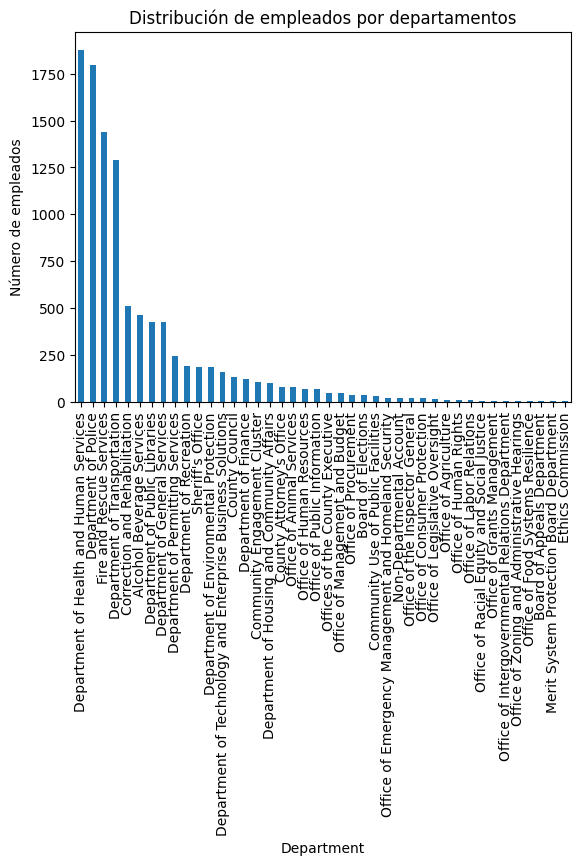

In [24]:
empleados["Department_Name"].value_counts().plot(kind="bar")
plt.xlabel("Department")
plt.ylabel("Número de empleados")
plt.title("Distribución de empleados por departamentos")
plt.show() 